In [3]:
import censusdis.data as ced

In [4]:
#American Community Survey 5 year data
DATASET = "acs/acs5"

In [5]:
#Year for data
YEAR = 2020

In [6]:
#Population & Median Household income variables
TOTAL_POPULATION_VARIABLE = "B01003_001E"
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

In [7]:
#Variables for query
VARIABLES = ["NAME", TOTAL_POPULATION_VARIABLE, MEDIAN_HOUSEHOLD_INCOME_VARIABLE]

In [8]:
#NJ Counties by Income
from censusdis import states

df_counties = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    state=states.NJ,
    county="*",
)

In [9]:
print(df_counties)

   STATE COUNTY                           NAME  B01003_001E  B19013_001E
0     34    003      Bergen County, New Jersey       931275       104623
1     34    009    Cape May County, New Jersey        92701        72385
2     34    015  Gloucester County, New Jersey       291745        89056
3     34    021      Mercer County, New Jersey       368085        83306
4     34    027      Morris County, New Jersey       492715       117298
5     34    033       Salem County, New Jersey        62754        64234
6     34    039       Union County, New Jersey       555208        82644
7     34    001    Atlantic County, New Jersey       264650        63680
8     34    005  Burlington County, New Jersey       446301        90329
9     34    007      Camden County, New Jersey       506721        70957
10    34    011  Cumberland County, New Jersey       150085        55709
11    34    013       Essex County, New Jersey       798698        63959
12    34    017      Hudson County, New Jersey     

In [19]:
df_counties.columns = ['STATE_CODE', 'COUNTY_CODE', 'COUNTY_NAME', 'POPULATION', 'MEDIAN_INCOME']

In [20]:
df_counties

,STATE_CODE,COUNTY_CODE,COUNTY_NAME,POPULATION,MEDIAN_INCOME
0,34,003,"Bergen County, New Jersey",931275,104623
1,34,009,"Cape May County, New Jersey",92701,72385
2,34,015,"Gloucester County, New Jersey",291745,89056
3,34,021,"Mercer County, New Jersey",368085,83306
4,34,027,"Morris County, New Jersey",492715,117298
5,34,033,"Salem County, New Jersey",62754,64234
6,34,039,"Union County, New Jersey",555208,82644
7,34,001,"Atlantic County, New Jersey",264650,63680
8,34,005,"Burlington County, New Jersey",446301,90329
9,34,007,"Camden County, New Jersey",506721,70957


In [22]:
df_sorted = df_counties.sort_values(by='POPULATION', ascending=False)
df_sorted

,STATE_CODE,COUNTY_CODE,COUNTY_NAME,POPULATION,MEDIAN_INCOME
0,34,003,"Bergen County, New Jersey",931275,104623
14,34,023,"Middlesex County, New Jersey",825015,91731
11,34,013,"Essex County, New Jersey",798698,63959
12,34,017,"Hudson County, New Jersey",671923,75062
15,34,025,"Monmouth County, New Jersey",620821,103523
16,34,029,"Ocean County, New Jersey",602018,72679
6,34,039,"Union County, New Jersey",555208,82644
9,34,007,"Camden County, New Jersey",506721,70957
17,34,031,"Passaic County, New Jersey",502763,73562
4,34,027,"Morris County, New Jersey",492715,117298


In [ ]:
# write dataframe to csv
# df_counties.to_csv('output.csv', index=False)
# df_sorted.to_csv('output.csv', index=False)

In [14]:
gdf_counties = ced.download(
    DATASET,
    YEAR,
    VARIABLES,
    state=states.NJ,
    county="*",
    with_geometry=True
)

(2048295.928045771, 2183092.8315101922, -362350.1953134922, -67931.86509457673)

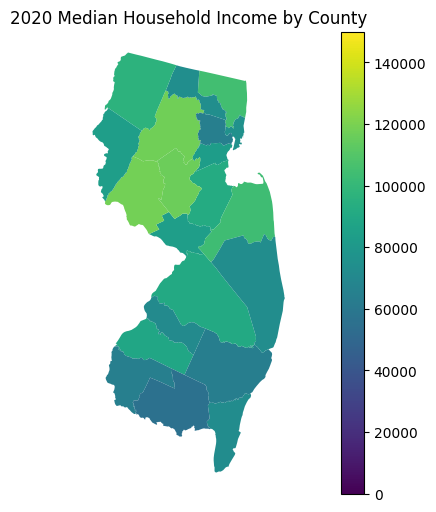

In [18]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_counties,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="viridis",
    legend=True,
    vmin=0.0,
    vmax=150_000,
    figsize=(12, 6)
)

ax.set_title(f"{YEAR} Median Household Income by County")

ax.axis("off")